In [68]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib import colors

In [69]:
#name,density,conductivity,capacity,color
materials = [
    ['air',1.2,0.0259,1007,[0.,0.,0.,0.]],
    ['D300',300,0.08,840,'gray'],
    ['sand',1680,0.33,800,'yellow'],
    ['EPPS',100,0.03,1260,'blue']
]

In [70]:
MAX_X = 1
MAX_Y = 0.5
dx = 0.01

NX = int(MAX_X/dx)+1
NY = int(MAX_Y/dx)+1

space = np.zeros((NY,NX),dtype=int)

In [71]:
space[:]=2
space[:,0:int(NX/2)] = 3

In [72]:
%matplotlib notebook

<IPython.core.display.Javascript object>


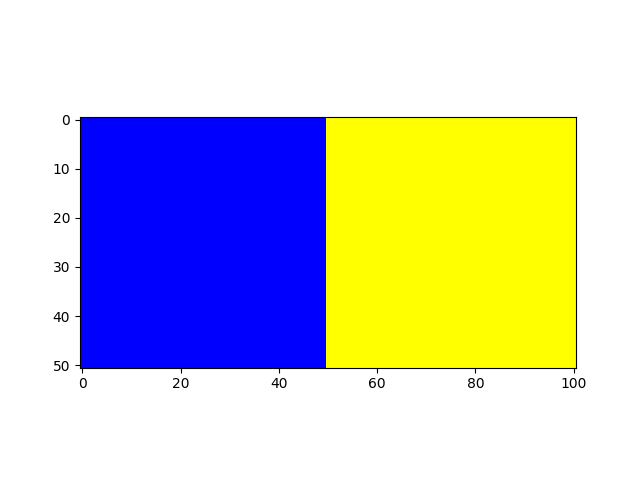

In [73]:
fig = plt.figure()
Space_image = np.zeros((NY,NX,4))

for i in range(1,len(materials)):
    Space_image += (space==i)[:,:,np.newaxis]*colors.to_rgba(materials[i][4])
    

imgplot = plt.imshow(Space_image)

In [74]:
T_min = 0
T_max = 100
T = np.zeros((NY,NX))

def setTempLimits():
    T[:,0]=T[:,1]
    T[:,-1]=T[:,-2]
    T[0,:]=T[1,:]
    T[-1,:]=T[-2,:]
    return

def zeroTemp():
    global T
    T[:,0:int(NX/2)] = 100
    setTempLimits()
    
zeroTemp()

<IPython.core.display.Javascript object>


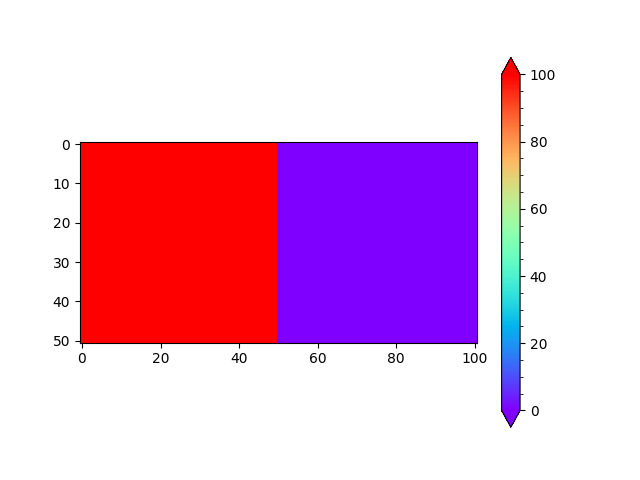

In [75]:
def drawTemp():
    global T_min
    global T_max
    
    fig = plt.figure()
    ax = plt.axes()
    
    imgplot = plt.imshow(T,cmap='rainbow',vmin=T_min,vmax=T_max, interpolation='none')
    cbar = fig.colorbar(imgplot, ax=ax, extend='both')
    cbar.minorticks_on()
    plt.show()

drawTemp()

In [76]:
dt=1

Q = np.zeros((NY,NX))
S = np.zeros((NY,NX))

for i in range(0,len(materials)):
    m = materials[i]
    q = m[1]*m[3]*dx**2
    s = dt*m[2]
    print(f'material={m[0]} q={q}J s={s}J s/q={s/q}')
    Q= (space==i)*q + (space!=i)*Q
    S= (space==i)*s + (space!=i)*S
    
Qc = Q[1:-1,1:-1]

Sc = S[1:-1,1:-1]
Sl = S[1:-1,0:-2]
Sr = S[1:-1,2:]
Su = S[0:-2,1:-1]
Sd = S[2:,1:-1]

Kl = (Sl+Sc)/2/Qc
Kr = (Sr+Sc)/2/Qc
Ku = (Su+Sc)/2/Qc
Kd = (Sd+Sc)/2/Qc

material=air q=0.12083999999999999J s=0.0259J s/q=0.21433300231711355
material=D300 q=25.200000000000003J s=0.08J s/q=0.003174603174603174
material=sand q=134.4J s=0.33J s/q=0.002455357142857143
material=EPPS q=12.600000000000001J s=0.03J s/q=0.0023809523809523807


In [77]:
t=60*60*24
nt = int(t/dt)

for n in range(0,nt):
    Tn = T.copy();
    Tc = Tn[1:-1,1:-1]
    Tl = Tn[1:-1,0:-2]
    Tr = Tn[1:-1,2:]
    Tu = Tn[0:-2,1:-1]
    Td = Tn[2:,1:-1]
    
    T[1:-1,1:-1] = Tc +\
        Kl*(Tl-Tc)+\
        Kr*(Tr-Tc)+\
        Ku*(Tu-Tc)+\
        Kd*(Td-Tc)
        
        
    setTempLimits()    

<IPython.core.display.Javascript object>


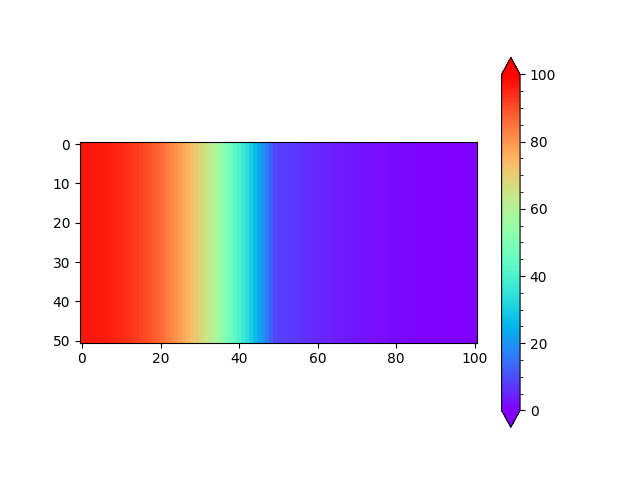

In [78]:
drawTemp()